## Weighted Kernel Density Estimation
implementing the first component of the proposed approach, which is Weighted Kernel Density Estimation

In [23]:
import numpy as np
from scipy.stats import norm
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

In [24]:
def weighted_kernel_density_estimation(data, weights, query_points, bandwidth):
    n = len(data)
    kde_values =[]
    print(query_points.shape)
    for i, x in enumerate(query_points):
        weighted_sum = 0.0
        total_weight = 0.0
        for j in range(n):
            weight = weights[j]
            kernel_value = norm.pdf((x - data[j]) / bandwidth)
            weighted_sum += weight * kernel_value
            total_weight += weight
        operande  = total_weight * bandwidth
        kde_values.append(weighted_sum / operande)

    return kde_values

In [25]:
# Generate a synthetic dataset using scikit-learn
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, random_state=42)

# Add outliers to the dataset
outliers = np.array([[2.5, 2.5], [-2.5, -2.5]])
X = np.concatenate((X, outliers))
y = np.concatenate((y, [1, 0]))

# Assume we have some weights associated with each data point
weights = np.random.rand(len(X))

# Define the range of values for which to estimate the density
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
resolution = 100
xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution),
                     np.linspace(y_min, y_max, resolution))
query_points = np.c_[xx.ravel(), yy.ravel()]

# Set the bandwidth parameter for the kernel density estimation
bandwidth = 0.5

# Compute the weighted kernel density estimation for the query points
kde_values = weighted_kernel_density_estimation(X, weights, query_points, bandwidth)

# Reshape the density estimation results to match the grid shape
kde_values = kde_values.reshape(xx.shape)



(10000, 2)


AttributeError: 'list' object has no attribute 'reshape'

NameError: name 'xx' is not defined

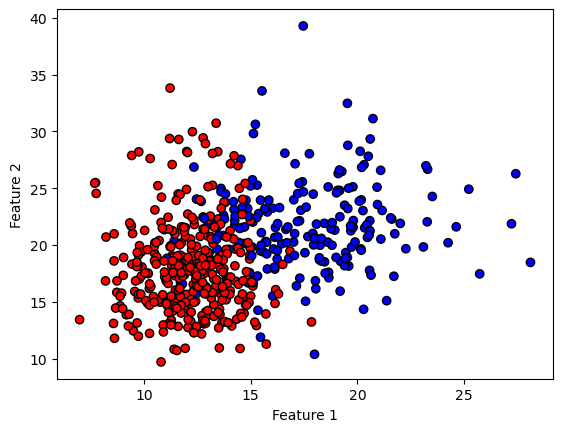

In [ ]:
# Plot the original data points with outliers
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the density contours
plt.contourf(xx, yy, kde_values, cmap='Blues', alpha=0.5)
plt.colorbar(label='Density')

# Add a color bar to show the class labels
cbar = plt.colorbar()
cbar.set_ticks(np.arange(2))
cbar.set_ticklabels(['Class 0', 'Class 1'])

# Show the plot
plt.show()

ValueError: 'c' argument has 2002 elements, which is inconsistent with 'x' and 'y' with size 1001.

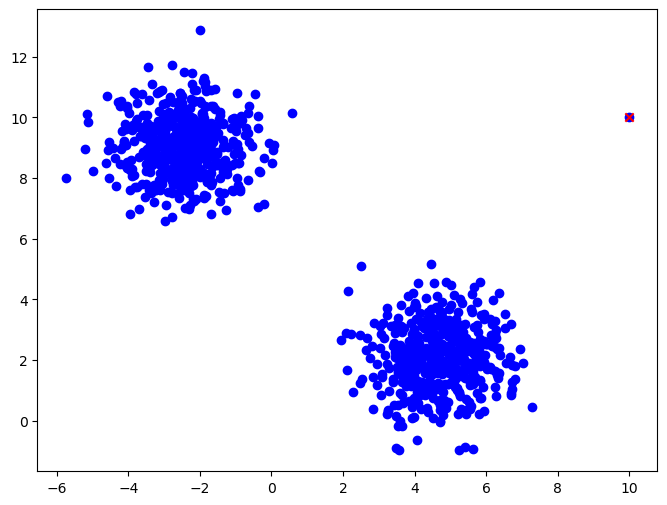

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.datasets import make_blobs

# Generate synthetic data with outliers
X, y = make_blobs(n_samples=1000, centers=2, random_state=42)
outliers = np.array([[10, 10]])  # Add an outlier
X = np.concatenate([X, outliers])

# Parameters for RKDE
bandwidth = 0.5
huber_c = 1.345  # Huber constant for Robust M-estimation

# Compute RKDE
kde = np.zeros_like(X)
for i, x in enumerate(X):
    weights = norm.pdf((X - x) / bandwidth)  # Gaussian weights
    residuals = np.abs(X - x)
    mask = residuals <= huber_c * bandwidth
    weights[mask] *= (1 - (residuals[mask] / (huber_c * bandwidth)) ** 2)  # Apply Huber function
    kde[i] = np.sum(weights) / (len(X) * bandwidth)  # Normalize the estimate

# Plot the original data and RKDE results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Original Data')
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', marker='x', label='Outliers')
plt.scatter(X[:, 0], X[:, 1], c=kde, cmap='hot', label='RKDE')
plt.colorbar(label='Density')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Robust Kernel Density Estimation')
plt.legend()
plt.show()
